<a href="https://colab.research.google.com/github/VanLan0/MIS710-T12023/blob/main/MIS710_Lec8_Opt_CV_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lecture 8 Week 8**
Author: Associate Professor Lemai Nguyen

**Objectives**: 
1. Model optimisation
2. Cross validation
3. Ensemble Learning

**Reference**: Pima Indians Diabetes Database Predict the onset of diabetes based on diagnostic measures

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Data**: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Tasks**

To build an ensemble learning model to accurately predict whether or not the patients in the dataset have diabetes or not

Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


# **Import libraries and functions**

In [226]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# **1. Model Optimisation**

## **1.1 Load and inspect data**

In [4]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/Diabetes.csv'

In [5]:
#loading data
records = pd.read_csv(url)

records.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
records.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **1.2 Detect and handle missing data**

In [ ]:
#Inspect missing data
print(records.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
records.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## **1.3 EDA**

<Axes: xlabel='DiabetesPedigreeFunction'>

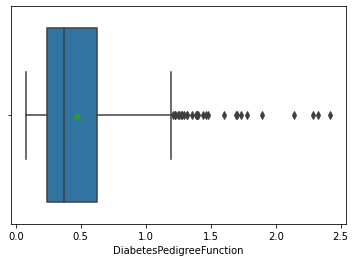

In [ ]:
sns.boxplot(x=records['DiabetesPedigreeFunction'], showmeans=True)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

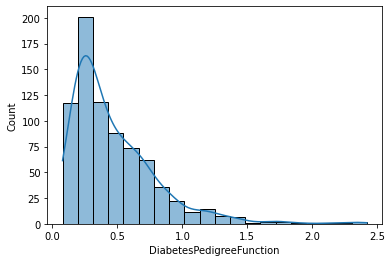

In [ ]:
sns.histplot(data=records, x='DiabetesPedigreeFunction',  bins=20, kde=True)

<Axes: xlabel='BMI'>

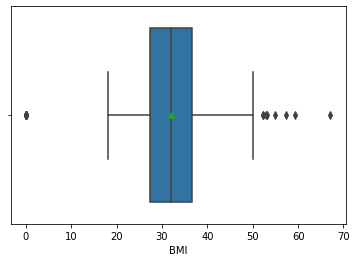

In [ ]:
#draw the boxplot for the column
sns.boxplot(x=records['BMI'], showmeans = True)

<Axes: xlabel='BMI', ylabel='Count'>

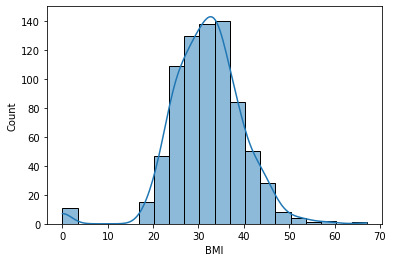

In [ ]:
#visualise the column 
sns.histplot(data=records, x='BMI',  bins=20, kde=True)

<Axes: xlabel='Outcome', ylabel='count'>

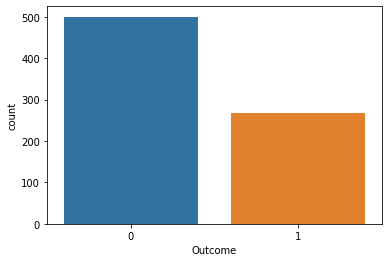

In [ ]:
sns.countplot(records, x='Outcome')

<Axes: xlabel='BMI', ylabel='Count'>

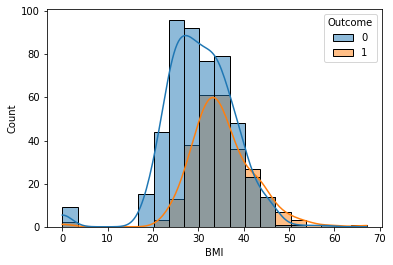

In [ ]:
#visualise the column 
sns.histplot(data=records, x='BMI', hue='Outcome', bins=20, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

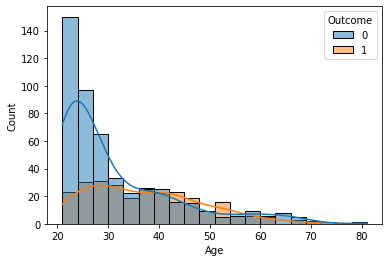

In [ ]:
#visualise the column 
sns.histplot(data=records, x='Age', hue='Outcome', bins=20, kde=True)

<Axes: >

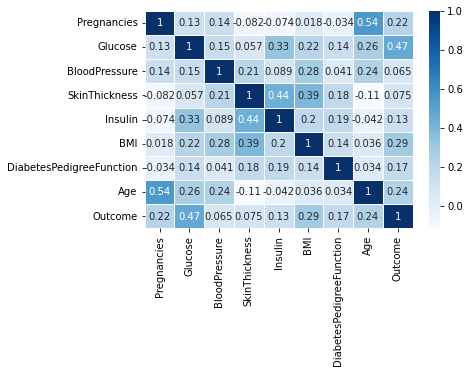

In [ ]:
  sns.heatmap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

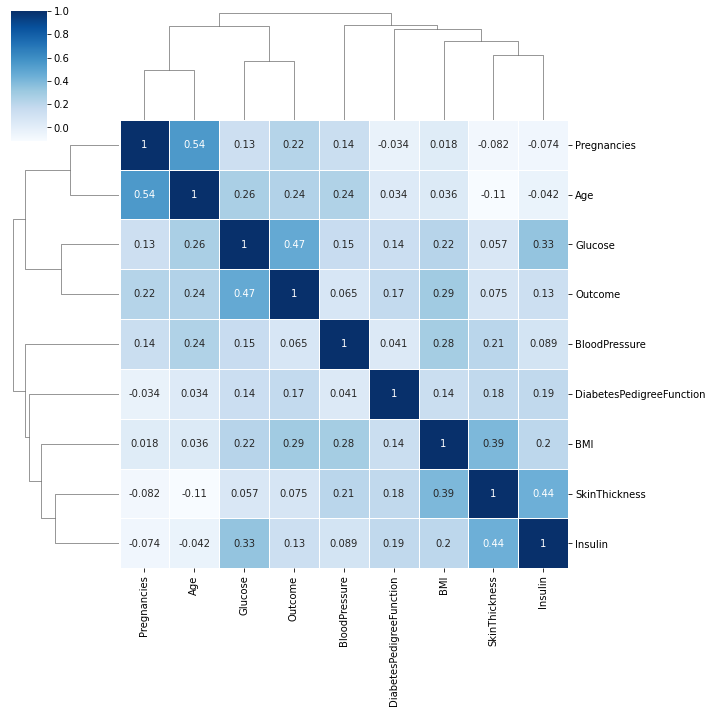

In [ ]:
 #visualise clustermap
 sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

## **1.4 Select features and target**


In [6]:
#Define the predictors 
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X=records.drop('Outcome', axis=1)
#Define the label
y=records['Outcome']
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


## **1.5 Split and normalise data**

In [7]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.35, stratify = y )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2023 )

In [ ]:
X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
183,5,73,60,0,0,26.8,0.268,27
134,2,96,68,13,49,21.1,0.647,26
280,0,146,70,0,0,37.9,0.334,28
438,1,97,70,15,0,18.2,0.147,21
405,2,123,48,32,165,42.1,0.520,26
...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52
562,1,87,68,34,77,37.6,0.401,24
436,12,140,85,33,0,37.4,0.244,41
544,1,88,78,29,76,32.0,0.365,29


## **1.6 Builing and evaluate Decision Trees**

### **Base DT**

In [8]:
# Create Decision Tree classifer object
base_clf = DecisionTreeClassifier(random_state=2023)

# Train Decision Tree Classifer
base_clf = base_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = base_clf.predict(X_test)


In [9]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [10]:
#print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  33]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       150
           1       0.60      0.62      0.61        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [11]:
# calculate performance metrics for the base DT
accuracy_no_pruning = accuracy_score(y_test, y_pred)
precision_no_pruning = precision_score(y_test, y_pred)
recall_no_pruning = recall_score(y_test, y_pred)
f1_no_pruning = f1_score(y_test, y_pred)

print('DT without prunning: ')
print('Accuracy: ','%.2f' % accuracy_no_pruning)
print('Precision: ', '%.2f' % precision_no_pruning)
print('Recall: ',  '%.2f' % recall_no_pruning)
print('F1 scopre :',  '%.2f' % f1_no_pruning)

DT without prunning: 
Accuracy:  0.72
Precision:  0.60
Recall:  0.62
F1 scopre : 0.61


### **Pre Prune DT**

In [108]:
# Create Decision Tree classifer object
pre_pruned_clf = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2023)

# Train Decision Tree Classifer
pre_pruned_clf = pre_pruned_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)

In [53]:
#print confusion matrix for the pre-pruned DT
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[134  16]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



In [14]:
# calculate performance metrics for pre_pruned DT
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
precision_pre_pruned = precision_score(y_test, y_pred_pre_pruned)
recall_pre_pruned = recall_score(y_test, y_pred_pre_pruned)
f1_pre_pruned = f1_score(y_test, y_pred_pre_pruned)

print('DT pre pruned: ')
print('Accuracy: ','%.2f' % accuracy_pre_pruned)
print('Precision: ', '%.2f' % precision_pre_pruned)
print('Recall: ',  '%.2f' % recall_pre_pruned)
print('F1 scopre :',  '%.2f' % f1_pre_pruned)

DT pre pruned: 
Accuracy:  0.74
Precision:  0.63
Recall:  0.64
F1 scopre : 0.64


### **Post Prune DT**

ccp_alpha = 0 by default, minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

In [66]:
# Post-prune the decision tree
path = base_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha
decision_trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=20, random_state=2023, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    decision_trees.append(dt)

# Find the decision tree with the highest accuracy on the validation data
accuracies = [accuracy_score(y_test, dt.predict(X_test)) for dt in decision_trees]
post_pruned_clf = decision_trees[accuracies.index(max(accuracies))]

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test)


In [67]:
#print confusion matrix
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[134  16]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



In [68]:
# calculate performance metrics for post_pruned DT
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)

print('DT post prunning: ')
print('Accuracy: ','%.2f' % accuracy_post_pruned)
print('Precision: ', '%.2f' % precision_post_pruned)
print('Recall: ',  '%.2f' % recall_post_pruned)
print('F1 scopre :',  '%.2f' % f1_post_pruned)

DT post prunning: 
Accuracy:  0.77
Precision:  0.74
Recall:  0.56
F1 scopre : 0.63


## **1.7 Model comparison**

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
#Base DT get predicted probabilities for the main class
y_pred_probs_base = base_clf.predict_proba(X_test)
y_pred_probs_base = y_pred_probs_base[:, 1]

#Pre pruned DT get predicted probabilities for the main class
y_pred_probs_pre = pre_pruned_clf.predict_proba(X_test)
y_pred_probs_pre = y_pred_probs_pre[:, 1]

#Post pruned DT get predicted probabilities for the main class
y_pred_probs_post = post_pruned_clf.predict_proba(X_test)
y_pred_probs_post = y_pred_probs_post[:, 1]

In [59]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred_probs_base)
auc_base=metrics.auc(fpr_base, tpr_base)

fpr_pre_pruned, tpr_pre_pruned, thresholds_pre_pruned = roc_curve(y_test, y_pred_probs_pre)
auc_pre_pruned=metrics.auc(fpr_pre_pruned, tpr_pre_pruned)

fpr_post_pruned, tpr_post_pruned, thresholds_post_pruned = roc_curve(y_test, y_pred_probs_post)
auc_post_pruned=metrics.auc(fpr_post_pruned, tpr_post_pruned)

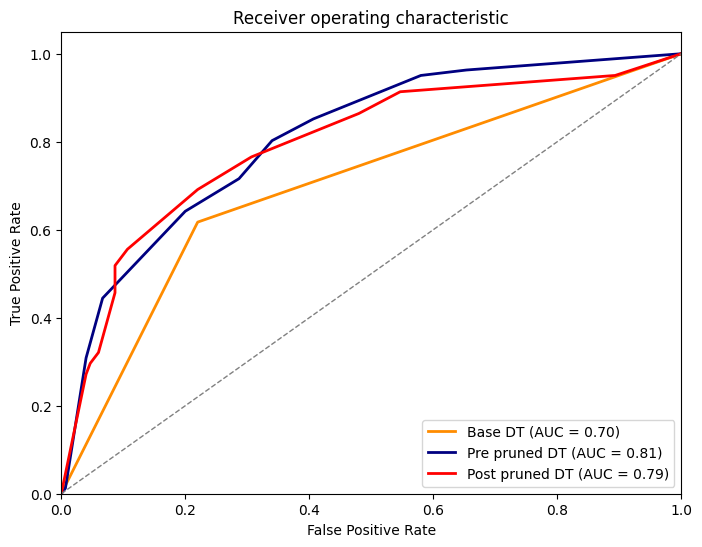

Base DT  AUC: 0.70
Pre pruned DT  AUC: 0.81
Post pruned DT  AUC: 0.79


In [60]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='darkorange', lw=2, label='Base DT (AUC = %0.2f)' % auc_base)
plt.plot(fpr_pre_pruned, tpr_pre_pruned, color='navy', lw=2, label='Pre pruned DT (AUC = %0.2f)' % auc_pre_pruned)
plt.plot(fpr_post_pruned, tpr_post_pruned, color='red', lw=2, label='Post pruned DT (AUC = %0.2f)' % auc_post_pruned)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Base DT  AUC:','%.2f' %  auc_base)
print('Pre pruned DT  AUC:','%.2f' %  auc_pre_pruned)
print('Post pruned DT  AUC:','%.2f' %  auc_post_pruned)

In [38]:
#print confusion matrix for the base DT
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  33]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       150
           1       0.60      0.62      0.61        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [37]:
#print confusion matrix for the pre-pruned DT
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[120  30]
 [ 29  52]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       150
           1       0.63      0.64      0.64        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



In [45]:
#print confusion matrix for the post_pruned DT
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[134  16]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
#Import plot_tree to  extract rules and visualise the decition tree model 
from sklearn.tree import plot_tree, export_text

In [ ]:
# Extract the base decision rules
rules = export_text(base_clf, feature_names=features)
print(rules)

In [ ]:
# Extract the pre_pruned decision rules
rules = export_text(pre_pruned_clf, feature_names=features)
print(rules)

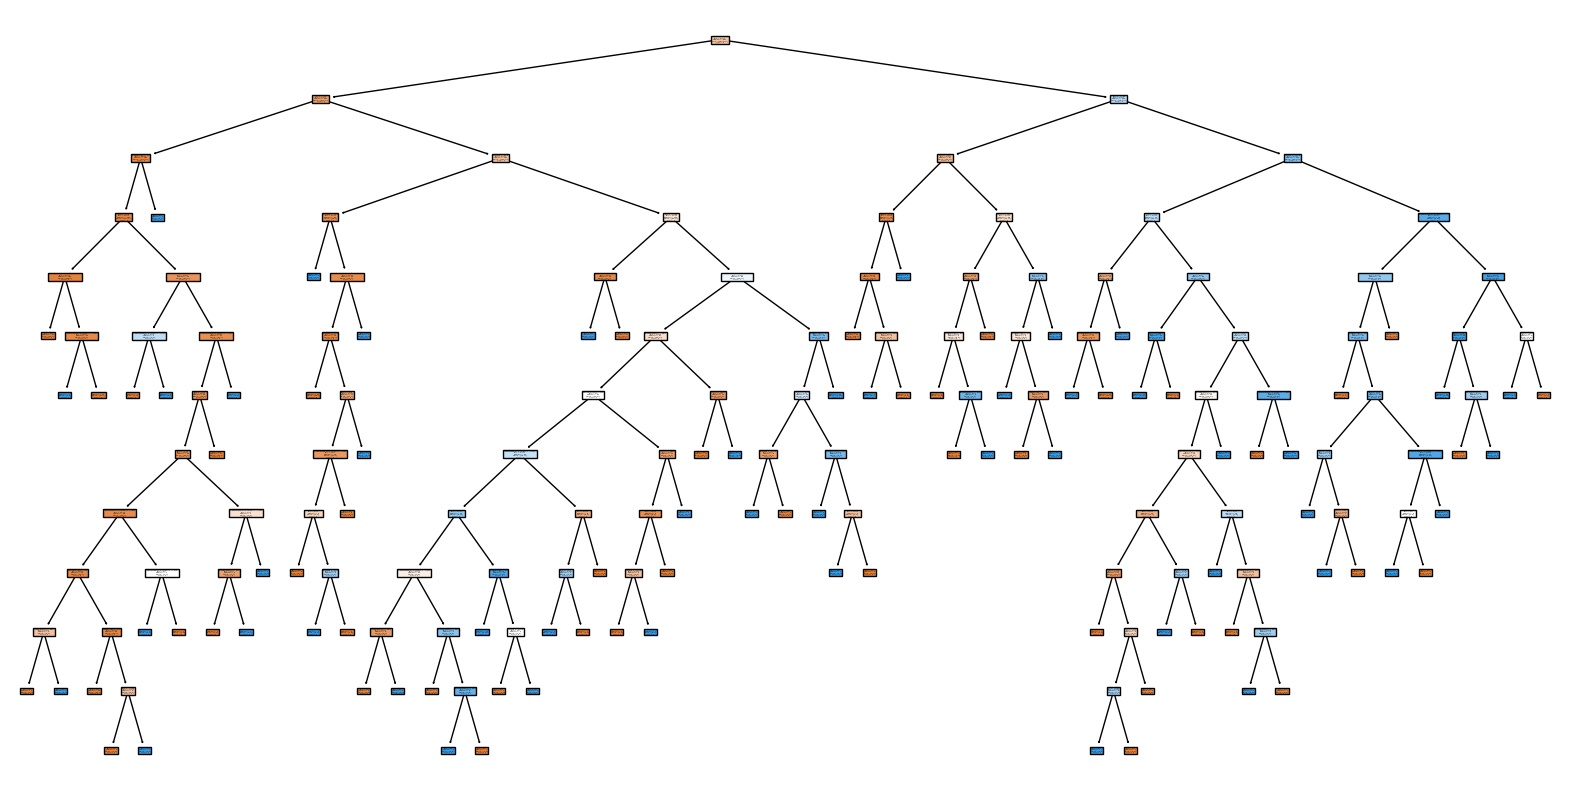

In [23]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(base_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

In [24]:
#Import libraries and classes; do this if we skip Case 1 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

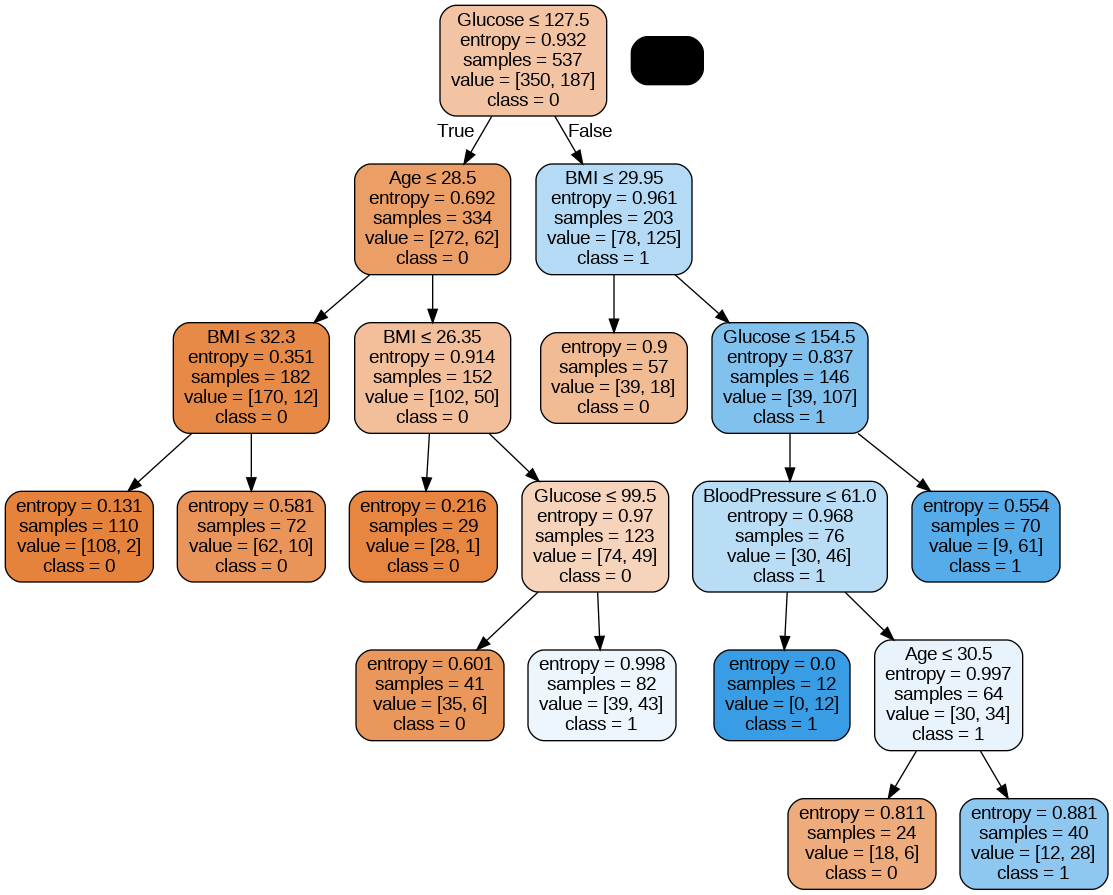

In [61]:
#Visualise the decision tree
dot_data = StringIO()
export_graphviz(pre_pruned_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Diabestes post DT.png')
Image(graph.create_png())

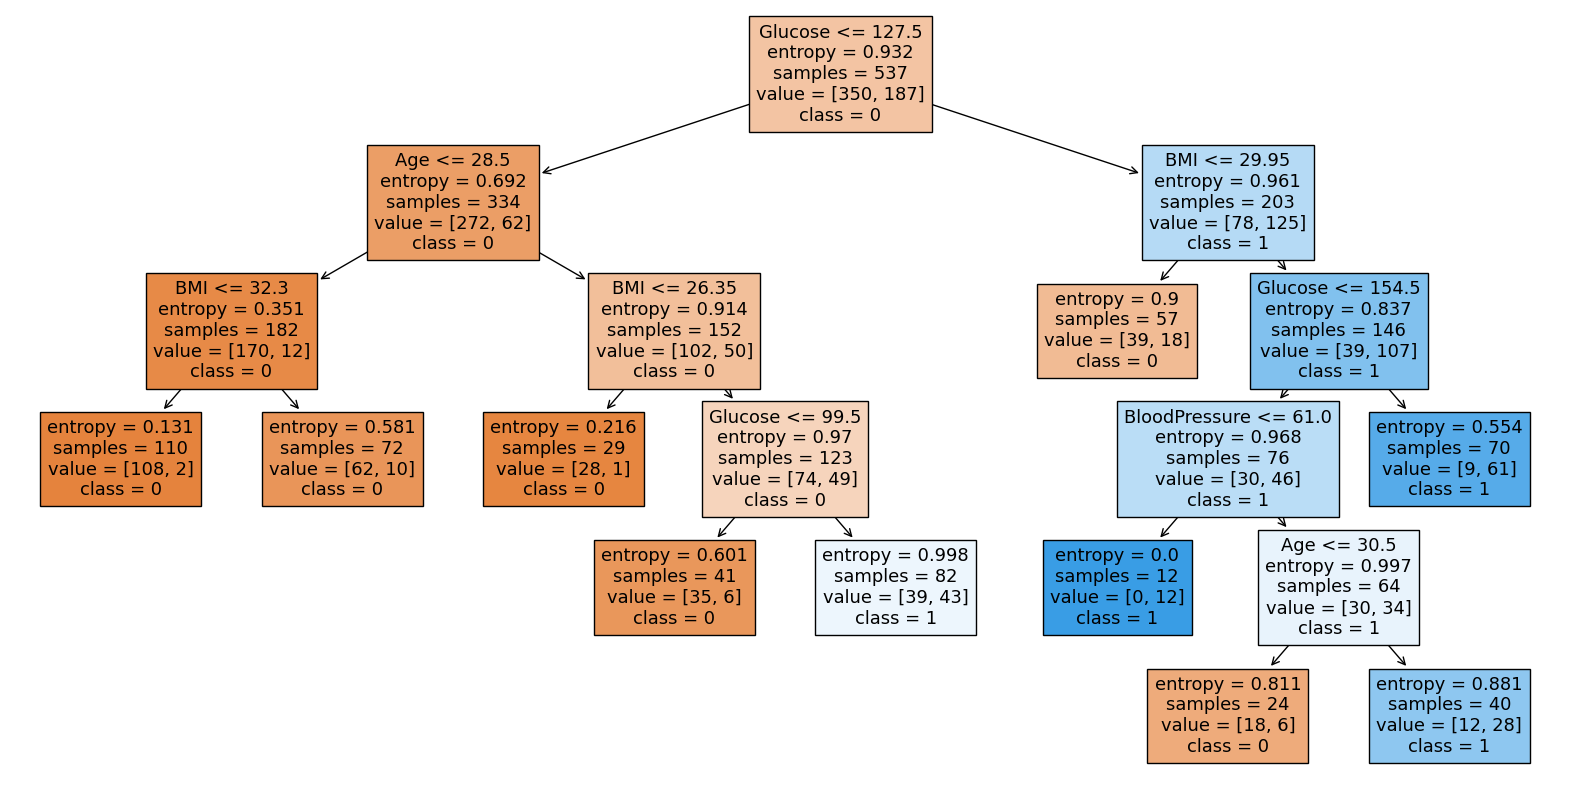

In [26]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

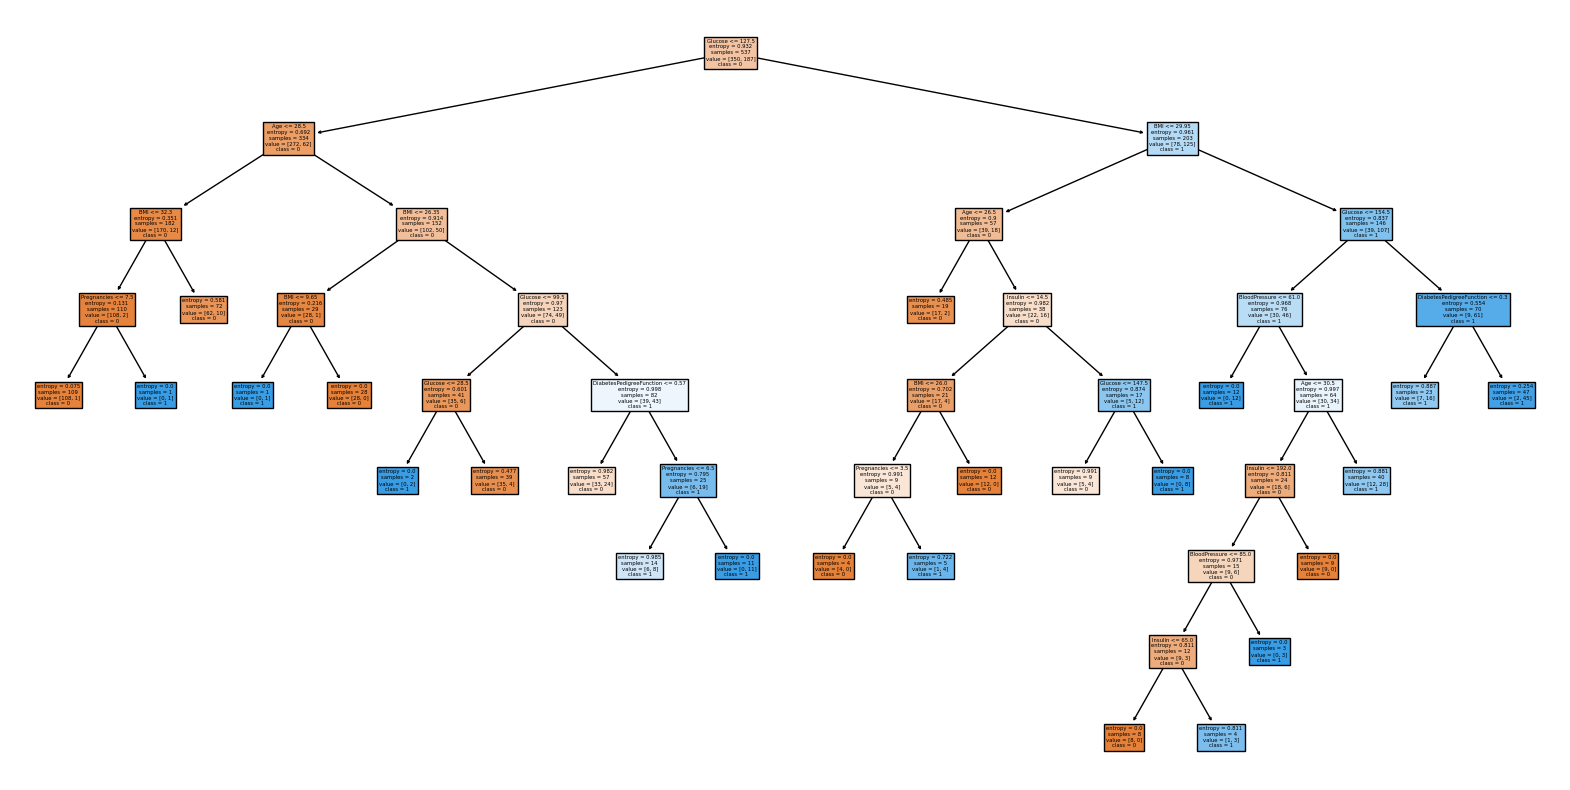

In [40]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(post_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

# **2. Cross Validation**

## **2.1. K-fold cross validation**

In [111]:
#Import cross validation function
from sklearn.model_selection import cross_val_score

We use the t-distribution to calculate the confidence interval because the distribution of the cross-validation scores may not be perfectly normal. The t-distribution is similar to the normal distribution but has fatter tails, which makes it more appropriate for small sample sizes.


In [42]:
# Calculate the 95% confidence interval of the mean F1 score
def get_95ci(metric):
  n = len(metric)
  se = metric.std() / np.sqrt(n)
  t=2.262  # t-value for 95% CI and n-1 degrees of freedom, 10 folders
  ci = t * se
  return ci

In [121]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(post_pruned_clf, X, y, cv=10)
f1 = cross_val_score(post_pruned_clf, X, y, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))


Accuracy scores: 0.724 (+/- 0.038)
F1 scores: 0.592 (+/- 0.053)


In [101]:
get_95ci(accuracy)

0.03799624679171644

In [107]:
accuracy

array([0. , 0. , 0.5, ..., 0.5, 1. , 0.5])

In [86]:
f1

array([0.58064516, 0.59574468, 0.60869565, 0.48      , 0.5       ,
       0.68085106, 0.66666667, 0.71428571, 0.53061224, 0.56      ])

## **2.2 Leave one out and Leave P out cross validation**

In [39]:
#import leave one out 
from sklearn.model_selection import LeaveOneOut
#import LeavePOut
from sklearn.model_selection import LeavePOut

In [43]:
loocv = LeaveOneOut()
accuracy = cross_val_score(pre_pruned_clf, X_test_norm, y_test, cv=loocv, scoring='accuracy')

# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 0.762 (+/- 0.063)


In [123]:
lpo = LeavePOut(p=2)
accuracy = cross_val_score(pre_pruned_clf, X_test, y_test, cv=lpo)



In [ ]:
# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 0.701 (+/- 0.645)


# **3. Ensemble learner**

## **3.1 Boostrap Aggregation** 

In [124]:
#Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [127]:
base_clf = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2023)

# Define the ensemble classifier using bagging
ensemble_classifier = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=2023)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_baggedtrees = ensemble_classifier.predict(X_test)

In [128]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_baggedtrees))

[[117  33]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.65      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



## **3.2 Random Forest**

In [129]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
# Structure a random forest model with 100 decision trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=2023)

# Train the model on the training set
rf_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_baggedtrees))

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=10)
print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean(): .3f}")
print(f"Std. dev. of CV accuracy: {cv_scores.std(): .3f}")

[[128  22]
 [ 43  38]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.65      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231

Cross-validation scores: [0.7012987  0.80519481 0.75324675 0.67532468 0.76623377 0.75324675
 0.80519481 0.85714286 0.73684211 0.80263158]
Mean CV accuracy:  0.766
Std. dev. of CV accuracy:  0.051


## **3.3 Stacking**

In [132]:
#Import classes and functions
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report


In [133]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [134]:
# Define base models
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000))
]


# Define the meta-classifier for the stacking ensemble
meta_classifier = LogisticRegression()



In [135]:
# Build the stacking ensemble model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)


In [136]:
# Train the stacking ensemble model on the training set
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression())

In [137]:
# Evaluate the stacking ensemble model on the testing set
y_pred = stacking_model.predict(X_test)

In [138]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84 13]
 [26 31]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.70      0.54      0.61        57

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [139]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .3f}')

Accuracy:  0.747


In [141]:
# Evaluate the stacking model using 10-fold cross validation
scores = cross_val_score(stacking_model, X, y, cv=10, scoring='accuracy')
print("Accuracy: {:.3f} (+/- {:.3f})".format(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.758 (+/- 0.070)


**Congratulations!**

Now your next task is to do it on your own! 

# **4. Do it yourself Task 1: KNN classifier**

## **4.1 KNN Model building**

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2023 )

In [8]:
#import scaler
from sklearn.preprocessing import StandardScaler

In [19]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

In [26]:
# Train a KNN model
k = 19 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_norm, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test_norm)


## **4.2 KNN model Evaluation**

In [27]:
# Print the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  12]
 [ 41  40]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       150
           1       0.77      0.49      0.60        81

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231



## **4.3 Optimising k**

Best k value: 14
Best accuracy: 0.788


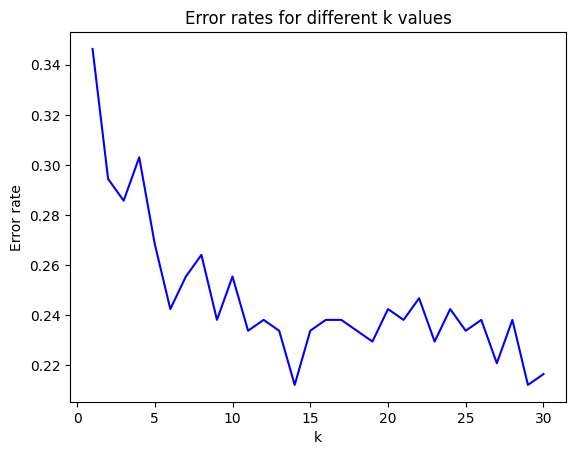

In [33]:
# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm, y_train)
    accuracy = knn.score(X_test_norm, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

In [72]:
# Train a KNN model
k = 14 # Number of neighbors
knn_bestk = KNeighborsClassifier(n_neighbors=k)
knn_bestk.fit(X_train_norm, y_train)

# Make predictions on the testing set
y_pred_bestk = knn_bestk.predict(X_test_norm)

In [25]:
#print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  12]
 [ 41  40]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       150
           1       0.77      0.49      0.60        81

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231



In [78]:
#print confusion matrix for the best thredhold
print(confusion_matrix(y_test, y_pred_bestk))
print(classification_report(y_test, y_pred_bestk))

[[139  11]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       150
           1       0.80      0.53      0.64        81

    accuracy                           0.79       231
   macro avg       0.79      0.73      0.74       231
weighted avg       0.79      0.79      0.78       231



In [ ]:
#get predicted probabilities for the main class
y_pred_probs_bestk = knn_bestk.predict_proba(X_test_norm)
y_pred_probs_bestk = y_pred_probs_bestk[:, 1]
print(y_pred_probs_bestk)

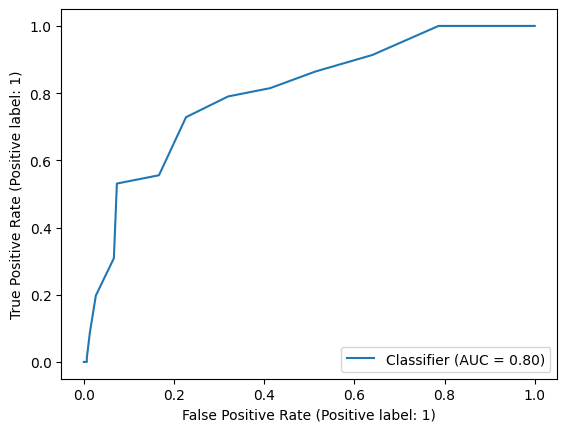

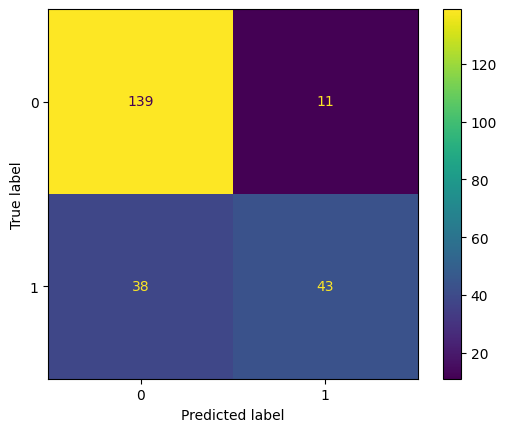

In [61]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs_bestk)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bestk)
plt.show()

**Find the best threshold**

AUC: 0.800


<Axes: >

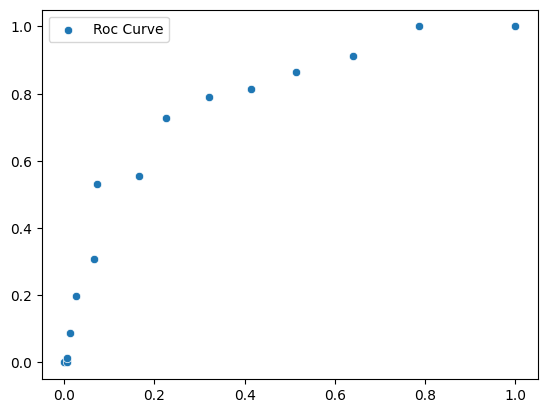

In [74]:
#get fpr, tpr, thredholds and AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_bestk)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

In [81]:
#from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

# print the best threshold and the highest AUC score on the test data
print('Best threshold:', best_threshold)


0.5714285714285714
Best threshold: 0.5714285714285714


In [86]:
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.42857142857142855


In [87]:
#get predicted probabilities for the main class
y_pred_best = (knn_bestk.predict_proba(X_test_norm)[:,1] >= best_threshold).astype(bool)

In [88]:
# Print the classification report for the best thredhold
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[116  34]
 [ 22  59]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       150
           1       0.63      0.73      0.68        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231



In [90]:
#Model evaluation
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))


Accuracy:  0.7705627705627706
Precision:  0.7692307692307693
Recall:  0.49382716049382713
F1:  0.6015037593984963


In [91]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred_best))
print("Precision: ", metrics.precision_score(y_test,y_pred_best))
print("Recall: ", metrics.recall_score(y_test,y_pred_best))
print("F1: ", metrics.f1_score(y_test,y_pred_best))

Accuracy:  0.7575757575757576
Precision:  0.6344086021505376
Recall:  0.7283950617283951
F1:  0.6781609195402298


## **4.4 Cross validation**

In [38]:
#Import cross validation function
from sklearn.model_selection import cross_val_score
#import leave one out 
from sklearn.model_selection import LeaveOneOut
#import LeavePOut
from sklearn.model_selection import LeavePOut

In [48]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(knn_bestk, X, y, cv=10)
f1 = cross_val_score(knn_bestk, X, y, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.754 (+/- 0.024)
F1 scores: 0.586 (+/- 0.038)


In [92]:
loocv = LeaveOneOut()
accuracy = cross_val_score(knn_bestk, X_test_norm, y_test, cv=loocv, scoring='accuracy')

# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 0.762 (+/- 0.063)


In [44]:

# Perform leave-p-out cross-validation with p=2
lpo = LeavePOut(p=2)
accuracy = cross_val_score(knn_bestk, X_test, y_test, cv=lpo)

# Print the mean accuracy and standard deviation of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.757 (+/- 0.605)


# **5. Do it yourself Task 2: KNN regression**

**KNN regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance 

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?

## **5.1 Load and inspect data, perform EDA and data preparation**

In [178]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'


In [179]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [95]:
#Inspect missing data
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


In [ ]:
records.describe()

,age,bmi,dependants,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

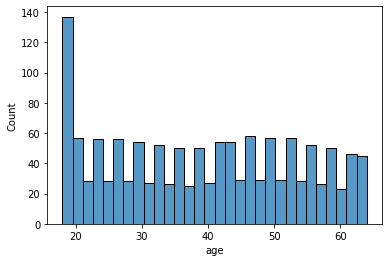

In [ ]:
sns.histplot(data=records, x='age', bins=30)

<AxesSubplot:xlabel='charges', ylabel='Count'>

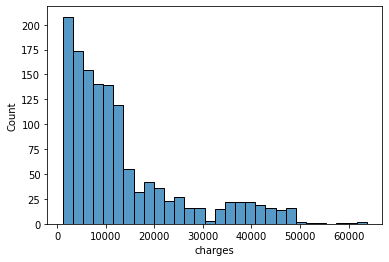

In [ ]:
sns.histplot(data=records, x='charges', bins=30)

<AxesSubplot:xlabel='age', ylabel='charges'>

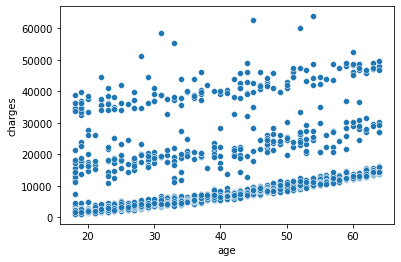

In [ ]:
sns.scatterplot(data=records, x='age', y='charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

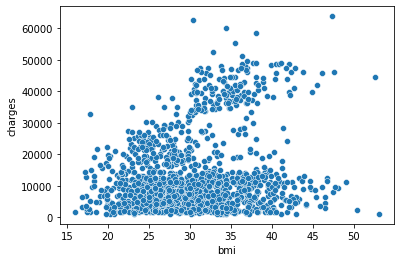

In [ ]:
sns.scatterplot(data=records, x='bmi', y='charges')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

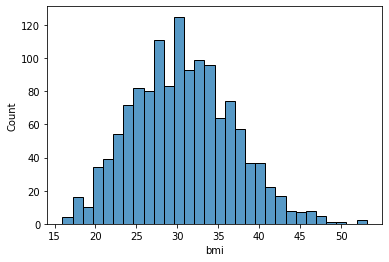

In [ ]:
sns.histplot(data=records, x='bmi', bins=30)

<AxesSubplot:xlabel='sex', ylabel='count'>

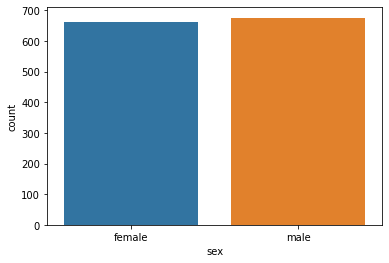

In [ ]:
sns.countplot(data=records, x='sex')

<AxesSubplot:xlabel='smoker', ylabel='count'>

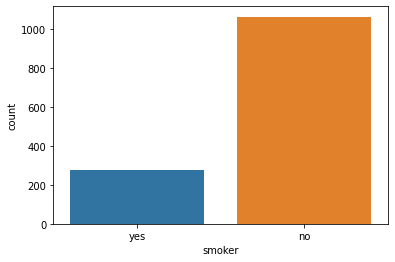

In [ ]:
sns.countplot(data=records, x='smoker')

<AxesSubplot:xlabel='dependants', ylabel='count'>

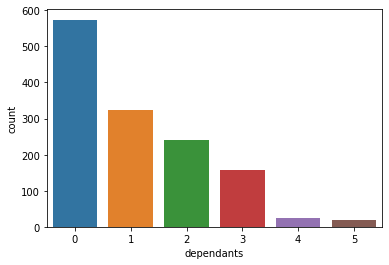

In [ ]:
sns.countplot(data=records, x='dependants')

<AxesSubplot:xlabel='region', ylabel='count'>

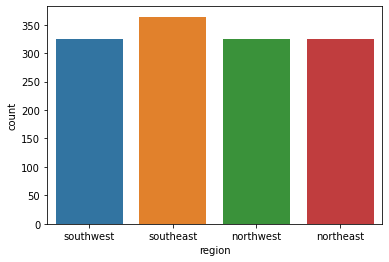

In [ ]:
sns.countplot(data=records, x='region')

<AxesSubplot:xlabel='charges', ylabel='Density'>

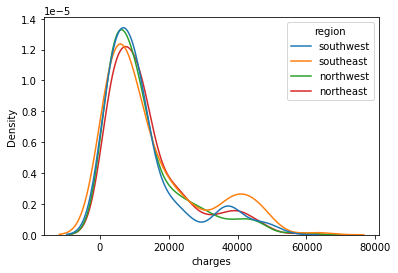

In [ ]:
sns.kdeplot(data=records, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='Density'>

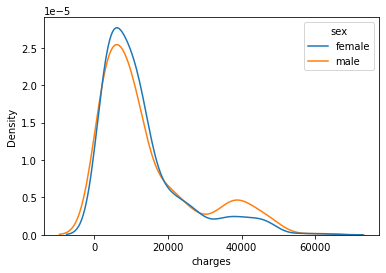

In [ ]:
sns.kdeplot(data=records, x='charges', hue='sex')

<AxesSubplot:xlabel='charges', ylabel='region'>

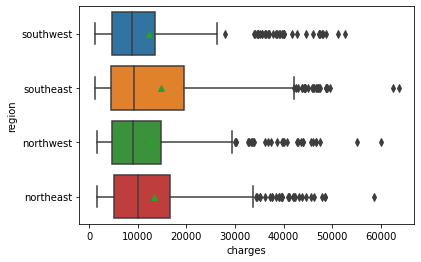

In [ ]:
sns.boxplot(data=records, x='charges', y='region', showmeans=True)

<AxesSubplot:xlabel='charges', ylabel='sex'>

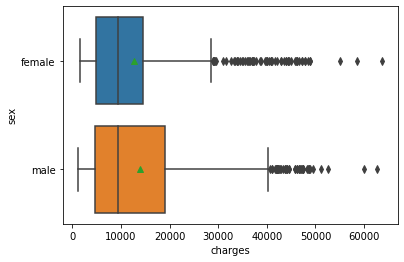

In [ ]:
sns.boxplot(data=records, x='charges', y='sex', showmeans=True)

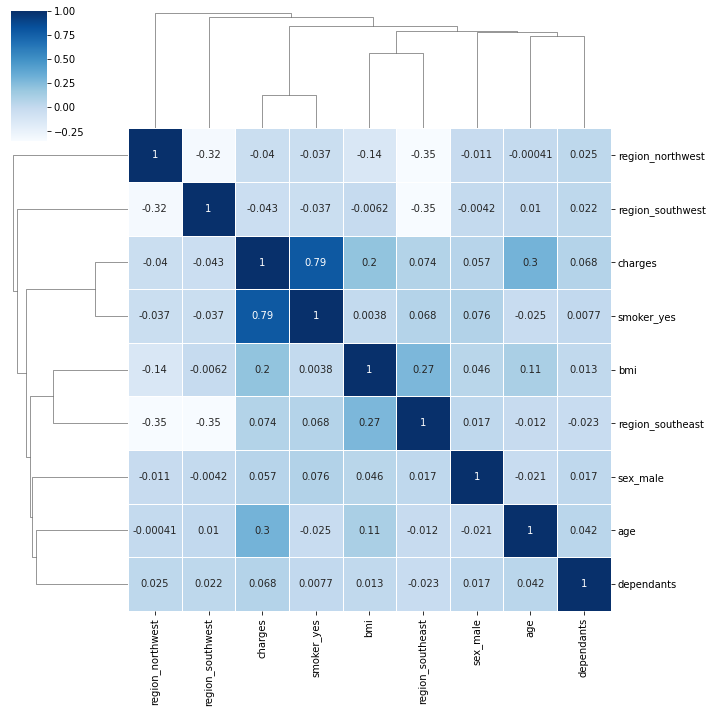

In [ ]:
#visualise clustermap
sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

In [180]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex','smoker', 'region'], drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB
None


In [181]:
records.head()

,age,bmi,dependants,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## **5.2 Feature selection, data split and normalisation**

In [182]:
X=records.drop('charges', axis=1)
y=records['charges']

In [183]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [184]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

In [189]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [185]:
# Create a KNN regressor object
k=5
knn = KNeighborsRegressor(k)

# Fit the model to the training data
knn.fit(X_train_norm, y_train)


KNeighborsRegressor()

In [191]:
# Predict the house prices for the testing data
y_pred = knn.predict(X_test_norm)

In [192]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head()


,age,bmi,dependants,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Actual,Predicted
748,47,36.000,1,0,0,0,0,1,8556.90700,8490.840800
745,50,30.115,1,0,0,1,0,0,9910.35985,13007.466250
57,18,31.680,2,1,1,0,1,0,34303.16720,33060.069840
546,28,35.435,0,1,0,0,0,0,3268.84665,7279.783470
279,51,21.560,1,0,0,0,1,0,9855.13140,13747.123116


In [200]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error in $: {np.sqrt(mse):.3f}")
print(f"R2: {r2:.4f}")

Root Mean Squared Error in $: 5272.567
R2: 0.8147


In [133]:
records['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

## **5.3 Cross Validation**

In [125]:
#Import Kfold
from sklearn.model_selection import KFold, cross_val_score

In [194]:
# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

In [199]:
# Perform cross-validation on the KNN model
neg_mse_scores = cross_val_score(knn, X_norm, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_norm, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))


Average RMSE: 5393.88 (95% CI: 5080.28, 5707.48)
Average R2: 0.80 (95% CI: 0.78, 0.81)


## **5.4. Ensemble learning regressor**

In [205]:
#Import functions
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [243]:
# Create the random forest ensemble learner model
rf_model = RandomForestRegressor(n_estimators=100, random_state=2023)

# Train the model on the training data
rf_model.fit(X_train_norm, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test_norm)

# Calculate the mean squared error of the model's predictions
mse_rf = mean_squared_error(y_test, y_pred)

# Calculate the R2 score
r2_rf = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error in $: {np.sqrt(mse_rf):.3f}")
print(f"R2: {r2_rf:.4f}")

Root Mean Squared Error in $: 4773.197
R2: 0.8481


In [244]:
# Create the random forest ensemble learner model
ab_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=2023)

# Train the model on the training data
ab_model.fit(X_train_norm, y_train)

# Make predictions on the testing data
y_pred_ab = ab_model.predict(X_test_norm)

# Calculate the mean squared error of the model's predictions
mse_ab = mean_squared_error(y_test, y_pred_ab)

# Calculate the R2 score
r2_ab = r2_score(y_test, y_pred_ab)

print(f"Root Mean Squared Error in $: {np.sqrt(mse_ab):.3f}")
print(f"R2: {r2_ab:.4f}")

Root Mean Squared Error in $: 4968.524
R2: 0.8355


In [245]:
# Create the random forest ensemble learner model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=2023)

# Train the model on the training data
gbr_model.fit(X_train_norm, y_train)

# Make predictions on the testing data
y_pred_gbr = gbr_model.predict(X_test_norm)

# Calculate the mean squared error of the model's predictions
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# Calculate the R2 score
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Root Mean Squared Error in $: {np.sqrt(mse_gbr):.3f}")
print(f"R2: {r2_gbr:.4f}")

Root Mean Squared Error in $: 4447.047
R2: 0.8682


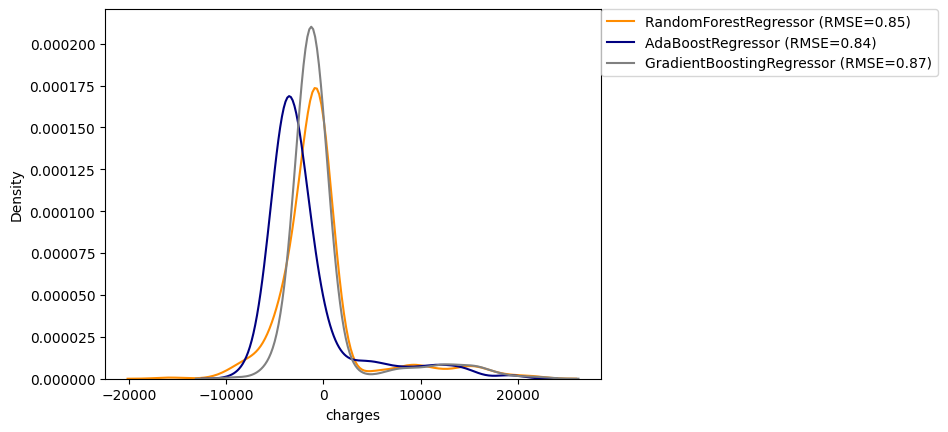

In [246]:
fig, ax = plt.subplots()

sns.kdeplot(x=y_test-y_pred_rf, color='darkorange', label=f'RandomForestRegressor (RMSE={r2_rf:.2f})', ax=ax)
sns.kdeplot(x=y_test-y_pred_ab, color='navy', label=f'AdaBoostRegressor (RMSE={r2_ab:.2f})' , ax=ax)
sns.kdeplot(x=y_test-y_pred_gbr, color='gray', label=f'GradientBoostingRegressor (RMSE={r2_gbr:.2f})' , ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.show()